In [1]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import MaxNLocator
pd.options.mode.chained_assignment = None

C:\Users\Dorris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dorris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dorris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Dorris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [2]:
bankdata = pd.read_csv(r'C:\Users\Dorris\Desktop\Bankdata.csv')

In [3]:
bankdata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bankdata.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
bankdata.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [8]:
bankdata.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [9]:
bankdata.rename(columns = {'Gender':'IsMale'}, inplace=True)
bankdata.IsMale.loc[bankdata.IsMale == 'Female'] = 0
bankdata.IsMale.loc[bankdata.IsMale == 'Male'] = 1

num_subset = bankdata.select_dtypes('number')
cat_subset = bankdata.select_dtypes('object')

cat_subset = pd.get_dummies(cat_subset)
denorm_bankdata = pd.concat([cat_subset, num_subset], axis=1)

maxvals = num_subset.astype(float).max()               
numericalColumns = {'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'}
for col in numericalColumns:
  num_subset[str(col)] = num_subset[str(col)]/maxvals[col]  
bankdata = pd.concat([cat_subset, num_subset], axis=1)      
print(bankdata.dtypes)  

display(bankdata.head())

bankX = bankdata.iloc[:,:12]
bankY = bankdata.iloc[:,12:13]

X = bankX.values 
Y = bankY.values 

Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
IsMale_0               uint8
IsMale_1               uint8
CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
dtype: object


,Geography_France,Geography_Germany,Geography_Spain,IsMale_0,IsMale_1,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,1,0,0.728235,0.456522,0.2,0.000000,0.25,1,1,0.506763,1
1,0,0,1,1,0,0.715294,0.445652,0.1,0.334031,0.25,0,1,0.562734,0
2,1,0,0,1,0,0.590588,0.456522,0.8,0.636357,0.75,1,0,0.569679,1
3,1,0,0,1,0,0.822353,0.423913,0.1,0.000000,0.50,0,0,0.469151,0
4,0,0,1,1,0,1.000000,0.467391,0.2,0.500246,0.25,1,1,0.395435,0


C:\Users\Dorris\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


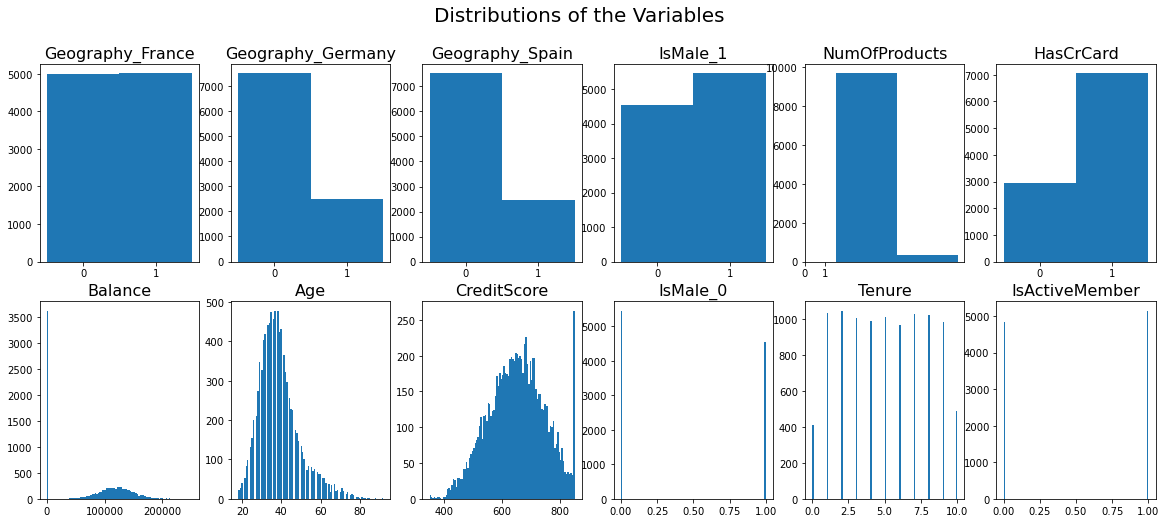

In [11]:
list_binary = [0,1,2,4,9,10]
list_normal = [3,5,6,7,8,11]
order = [0,1,2,4,9,10,8,6,5,3,7,11]

fig=plt.figure(figsize=(20,8))
for i in range(len(order)):
    xi = denorm_bankdata.values[:,order[i]]
    ax1 = fig.add_subplot(2,len(order)/2,i+1)
    plt.title(list(bankdata)[order[i]],fontsize=16)
    if i<6:
        plt.hist(xi,2)
        plt.xticks([0.25,0.75], np.arange(0, 2, 1))
    else:
        plt.hist(xi,100)
plt.suptitle('Distributions of the Variables',fontsize=20)
plt.show()


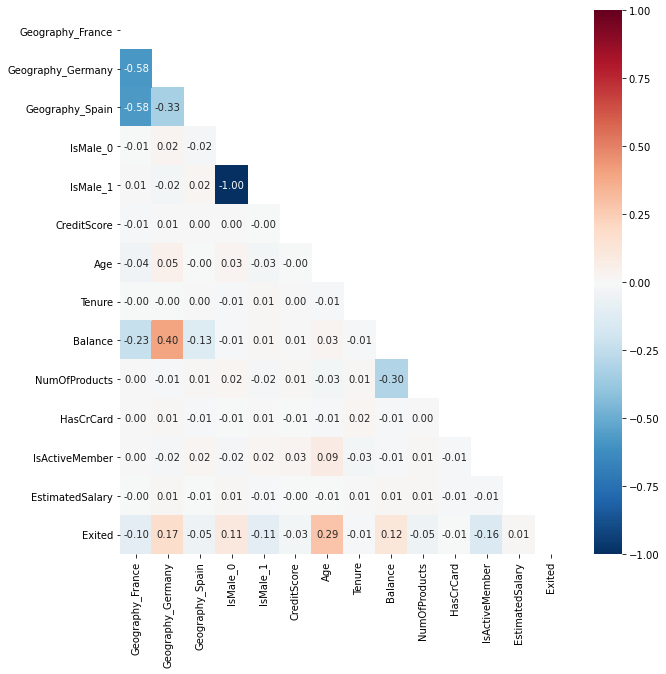

In [13]:
fig=plt.figure(figsize=(10,10))
CX=bankdata.corr()
mask = np.zeros_like(CX, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heat=sns.heatmap(CX,mask=mask,annot=True, vmin=-1, vmax=1, fmt='.2f',cmap='RdBu_r')
fig.add_subplot(heat)
plt.show()

In [16]:
from tensorflow.keras.layers     import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
X_train, X_val, Y_train, Y_val = train_test_split(X, Y.ravel(), test_size=0.3)

iterations = 2

In [ ]:
origDataModel = []

for i in range(iterations):
  
  print("Iteration Nº", i, ": \n")

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y.ravel(), test_size=0.3)

  model = tf.keras.Sequential()

  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Dense(128,  activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Dense(64, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Dense(32, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Dense(8,  activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer=tf.train.AdamOptimizer(),
                loss='binary_crossentropy',
                metrics=['acc'])

  model_logs = model.fit(X_train,
          Y_train,
          batch_size=32,
          epochs=120,
          verbose=0, 
          validation_data=(X_test, Y_test)) 
  origDataModel.append(model)

  score = model.evaluate(X_val, Y_val, verbose=0)
  print("Accuracy training with imbalanced data (default threshold=0.5): {:-5f} %".format(score[1] * 100))

  Y_pred = model.predict(X_val) > 0.5
  matConf = confusion_matrix(Y_val, Y_pred)
  valsize = Y_val.shape[0]

  plt.figure(figsize=(6, 5))
  ax = sb.heatmap(matConf, annot=True, fmt=".0f")
  ax.set_ylabel('Original', fontsize=15)
  ax.set_xlabel('Predicted', fontsize=15)
  plt.title("Imbalanced data")
  plt.show()

Iteration Nº 0 : 



In [ ]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTENC, ADASYN
from imblearn.combine import SMOTEENN

li = [ClusterCentroids, SMOTENC, ADASYN, SMOTEENN]
li_names = ["ClusterCentroids", "SMOTENC", "ADASYN", "SMOTEENN"] 
models = []  
cat_index = [0, 1, 2, 4, 9, 10] 
for i in range(iterations):
  
  print("Iteration Nº", i, ": \n")

  plt.figure(figsize=(12, 10))  # Establishing the heatmap size before plotting
  plt.suptitle("Confusion matrix for each resampling technique (X axis: Predicted, Y axis: Original)", fontsize=16)

  for n, method in enumerate(li):

    if(method==SMOTENC):
      resampler = method(cat_index) 
    else: resampler = method()

    X_resampled, Y_resampled = resampler.fit_resample(X, Y.ravel()) 
    Y_resampled = Y_resampled[:, np.newaxis]

    print("After", li_names[n], ": \nX.shape: {}, Y.shape: {}".format(X_resampled.shape, Y_resampled.shape))
    print("{} '0' labels, {} '1' labels".format(sum(Y_resampled==0), sum(Y_resampled==1)))

    data_resampled = np.hstack((X_resampled, Y_resampled))
    np.random.shuffle(data_resampled)
    X_resampled = data_resampled[:,:12]
    Y_resampled = data_resampled[:,12:13]

    X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled.ravel(), test_size=0.3)

    modelresampled = tf.keras.Sequential()

    modelresampled.add(Dense(256, activation='relu'))
    modelresampled.add(BatchNormalization())
    modelresampled.add(Dropout(0.3))

    modelresampled.add(Dense(128,  activation='relu'))
    modelresampled.add(BatchNormalization())
    modelresampled.add(Dropout(0.3))

    modelresampled.add(Dense(64, activation='relu'))
    modelresampled.add(BatchNormalization())
    modelresampled.add(Dropout(0.3))

    modelresampled.add(Dense(32, activation='relu'))
    modelresampled.add(BatchNormalization())
    modelresampled.add(Dropout(0.3))

    modelresampled.add(Dense(8,  activation='relu'))
    modelresampled.add(BatchNormalization())
    modelresampled.add(Dropout(0.3))

    modelresampled.add(Dense(1, activation='sigmoid'))

    modelresampled.compile(optimizer=tf.train.AdamOptimizer(),
                  loss='binary_crossentropy',
                  metrics=['acc'])
    modelresampled_logs = modelresampled.fit(X_train,
            Y_train,
            batch_size=32,
            epochs=120,
            verbose=0,  
            validation_data=(X_test, Y_test)) 

    models.append(modelresampled)

    score = modelresampled.evaluate(X_val, Y_val, verbose=0) 
    print("Accuracy training with resampled data (default threshold=0.5): {:-5f} %\n".format(score[1] * 100))
    Y_pred = modelresampled.predict(X_val) > 0.5
    matConf = confusion_matrix(Y_val, Y_pred)
    valsize = Y_val.shape[0]

    ax = plt.subplot(2, 2, n+1)
    ax.set_title(li_names[n])
    ax = sb.heatmap(matConf, annot=True, fmt=".0f")

  plt.show()

In [ ]:
lst_insert = [x for x in range(0, iterations*(len(li_names)+1)) if x % (len(li_names)+1) == 0]

for ie, e in enumerate(lst_insert): models.insert(e, origDataModel[ie])
  
li_names.insert(0, "Original data") 

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

for i in range(iterations):

  plt.figure(i+1, figsize=(11, 11))
  plt.title('ROC Curve for iteration Nº '+str(i), fontsize=20)
  plt.xlabel('False positive rate', fontsize=15)
  plt.ylabel('True positive rate', fontsize=15)
  plt.plot([0, 1], [0, 1], '--', color='black')

  for j in range(len(li_names)):  
    pred = models[len(li_names)*i+j].predict(X_val).ravel()  
    fpr, tpr, thresholds = roc_curve(Y_val, pred)  
    auc_ = auc(fpr, tpr)

    opt_index = np.argmax(np.abs(tpr-fpr))
    opt_threshold = thresholds[opt_index]
    
    plt.plot(fpr, tpr, label=li_names[j]+' (AUC = {:.5f}, optimal threshold = {:.5f})'.format(auc_, opt_threshold))
    
  plt.legend(loc='lower right', prop={'size': 14})
